In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
import numpy
print('Version of numpy: ',numpy.__version__) #1.19.5
import scipy
print('Version of scipy: ',scipy.__version__) #1.10.1
import statsmodels
print('Version of statsmodels: ',statsmodels.__version__) #0.12.0
import sklearn
print('Version of sklearn: ',sklearn.__version__) #0.12.0

Version of numpy:  1.19.5
Version of matplotlib:  3.6.2
Version of scipy:  1.10.1
Version of statsmodels:  0.12.0
Version of sklearn:  0.24.1


In [5]:
response=pd.read_excel("Supplementary Tables.xlsx",sheet_name=2,skiprows=2)
response

,ID,Patient_ID,Timepoint,Treatment,SRFS_Response,CMS subtypes,TME subtypes,TNFA_SIGNALING_VIA_NFKB,HYPOXIA,CHOLESTEROL_HOMEOSTASIS,...,KRAS_SIGNALING_DN,PANCREAS_BETA_CELLS,Epithelial,Endothelial,Fibroblast,Hepatocytes,Myeloid,NK cell,T cell,B cell
0,B01_Post1,B01,Post1,Post,Unknown,CMS4,IE/F,1.042037,0.738919,-1.954039,...,1.170270,-2.387499,0.280754,0.081515,0.395758,8.680000e-08,0.133990,1.130000e-06,3.240000e-06,1.079787e-01
1,B01_Pre,B01,Pre,Pre,PR,CMS2,D,-0.619001,-1.027163,-0.428688,...,-1.490826,-1.999007,0.915970,0.025230,0.055159,6.260000e-08,0.003315,3.249310e-04,4.990000e-07,1.990000e-07
2,B02_Post1,B02,Post1,Post,Unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B02_Post2,B02,Post2,Post,PD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B02_Pre,B02,Pre,Pre,PR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,B55_Pre,B55,Pre,Pre,PR,CMS2,D,0.343593,-1.889754,-1.065374,...,-1.610180,-1.231925,0.765477,0.049222,0.090988,1.066789e-02,0.039983,2.647097e-02,2.987140e-04,1.689240e-02
109,B56_Post1,B56,Post1,Post,Unknown,CMS4,IE/F,1.231660,0.957325,-2.140226,...,-0.351186,-2.129700,0.032450,0.021431,0.382175,2.756793e-03,0.498818,1.090000e-07,1.850000e-07,6.236807e-02
110,B56_Pre,B56,Pre,Pre,PR,CMS2,IE,0.465280,-1.475886,-1.169808,...,-1.457167,-1.138764,0.805598,0.041341,0.065463,1.443971e-03,0.027975,2.208165e-02,2.383630e-04,3.585953e-02
111,B57_Post1,B57,Post1,Post,Unknown,CMS4,IE/F,0.191102,-0.016823,-1.853622,...,-1.470360,-1.226260,0.128116,0.054849,0.651312,2.623058e-03,0.156067,3.330000e-07,7.350000e-07,7.031897e-03


## Features

In [13]:
clin=pd.read_csv('groups.csv') #column group: 1 for PR; 2 for SD; 3 for PD
response=pd.merge(response,clin,on='Patient_ID') 
response

In [5]:
g1=clin.loc[clin['group'].isin(['12','123','13','133','1233'])]
g1.index=range(g1.shape[0]) # preatment responder 
g2=clin.loc[clin['group'].isin(['22','23','33','223','323'])]
g2.index=range(g2.shape[0]) # preatment non-responder 
g1

,Pre,PID,Rank,group,group1,time_os,status_os,time_pfs,status_pfs,cohort,...,HALLMARK_COAGULATIONdiff,HALLMARK_KRAS_SIGNALING_UPdiff,Monocytic lineagediff,Myeloid dendritic cellsdiff,WNT,RTK_RAS,TGFB,PI3K,P53,Tochc3
0,B01_Pre,B01,1,13,Unknown,21.600000,1,7.200000,1,1,...,1.132387,2.272719,3.449189,2.455896,1,0,0,0,1,0.0
1,B02_Pre,B02,2,123,123,17.633333,0,10.700000,1,1,...,NaN,NaN,NaN,NaN,1,1,0,1,1,NaN
2,B03_Pre,B03,3,123,123,53.766667,0,13.566667,1,1,...,-2.346250,0.813841,1.388011,0.131744,1,0,0,0,1,0.0
3,B04_Pre,B04,4,123,123,19.500000,1,8.300000,1,1,...,3.266970,2.318985,1.777709,1.783024,1,0,0,0,1,1.0
4,B05_Pre,B05,5,12,Unknown,22.000000,0,8.000000,0,1,...,NaN,NaN,NaN,NaN,0,1,0,1,1,NaN
5,B15_Pre,B15,15,12,Unknown,15.733333,1,7.300000,1,1,...,2.597460,1.041476,0.591476,0.770767,1,1,0,0,0,1.0
6,B16_Pre,B16,16,123,123,17.000000,1,8.466667,1,1,...,2.679922,2.259004,1.895391,2.362676,1,1,0,0,1,0.0
7,B18_Pre,B18,18,1233,1233,31.266667,1,12.800000,1,1,...,1.851687,1.062144,0.599721,1.245963,1,0,0,0,1,0.0
8,B19_Pre,B19,19,123,123,12.733333,0,10.233333,1,1,...,0.852834,2.517353,2.377970,2.598909,1,1,0,0,1,0.0
9,B21_Pre,B21,21,123,123,14.433333,1,8.533333,1,1,...,1.094605,0.792998,0.326301,1.001285,1,1,1,0,0,0.0


In [6]:
cna=pd.read_csv('broad_values_by_arm1.txt',sep='\t',index_col=0)
cna

,B01_Pre,B01_BOR1,B02_Pre,B02_BOR1,B02_BOR2,B03_BOR2,B03_BOR1,B03_Pre,B04_BOR1,B04_BOR2,...,B53_BOR1,B53_Pre,B54_BOR1,B54_Pre,B55_BOR1,B55_Pre,B56_BOR1,B56_Pre,B57_BOR1,B57_Pre
Arm,,,,,,,,,,,,,,,,,,,,,
chr1p,0.000,0.000,-0.272,0.000,-0.141,-0.172,-0.197,0.000,0.000,-0.181,...,0.000,0.000,0.000,0.000,-0.191,-0.323,0,-0.276,0,0.000
chr1q,0.000,0.000,-0.120,0.000,-0.141,-0.172,-0.197,0.000,0.000,-0.181,...,0.000,0.000,0.000,0.000,-0.191,-0.323,0,-0.276,0,0.000
chr2p,0.000,0.000,0.132,0.000,0.154,0.301,0.463,0.000,0.000,0.000,...,0.000,0.000,0.205,0.000,0.000,-0.328,0,0.000,0,0.000
chr2q,0.000,0.000,0.132,0.000,0.000,0.301,0.463,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.118,0.000,0,0.000,0,0.000
chr3p,0.000,0.000,0.000,0.000,0.000,-0.204,0.000,0.000,0.000,0.000,...,-0.122,-0.505,0.000,0.000,0.041,-0.323,0,0.000,0,0.000
chr3q,0.000,0.000,0.000,0.000,0.000,-0.204,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.183,0.010,0,0.000,0,0.000
chr4p,0.000,0.000,-0.563,-0.287,-0.569,0.000,-0.240,0.000,0.000,-0.520,...,0.000,0.000,0.000,0.000,-0.150,0.000,0,-0.247,0,0.000
chr4q,0.000,0.000,-0.563,-0.287,-0.569,-0.396,-0.240,0.000,0.000,-0.550,...,0.000,0.000,0.000,0.000,-0.150,0.000,0,-0.247,0,0.000
chr5p,0.000,0.000,-0.104,0.000,0.000,0.000,-0.247,0.000,0.116,0.000,...,0.000,0.000,0.000,0.000,-0.138,0.000,0,0.000,0,0.000


In [7]:
def gain_p(p):
    logr=np.log2((2+p)/2)
    return logr
def loss_p(p):
    logr=np.log2((2-p)/2)
    return logr

In [8]:
gain=cna[cna.mean(axis=1)>0]
gain=gain[list(set(gain.columns.tolist()).intersection(set(response.Timepoint)))]
gain=gain.loc[((gain<0).sum(axis=1))<=10]
for i in list(set(gain.columns.tolist()).intersection(set(response.Timepoint))):
    a=response.loc[response['Timepoint']==i,'purity']
    if a.isna().values[0]:
        gain[i]=np.nan
    else:
        logr=gain_p(a.values[0])
        gain.loc[gain[i]>=logr,i]=1
        gain.loc[gain[i]<logr,i]=0
loss=cna[cna.mean(axis=1)<0]
loss=loss[list(set(loss.columns.tolist()).intersection(set(response.Timepoint)))]
loss=loss.loc[((loss>0).sum(axis=1))<=10]
for i in list(set(loss.columns.tolist()).intersection(set(response.Timepoint))):
    a=response.loc[response['Timepoint']==i,'purity']
    if a.isna().values[0]:
        loss[i]=np.nan
    else:
        logr=loss_p(a.values[0])
        loss.loc[loss[i]<=logr,i]=-1
        loss.loc[loss[i]>logr,i]=0
gain.index=[i+'_gain' for i in gain.index.tolist()]
loss.index=[i+'_loss' for i in loss.index.tolist()]
cna=pd.concat([gain,loss])
cna=cna.T
cna.replace(-1, 1,inplace=True)

In [9]:
cna['Timepoint']=cna.index
response=pd.merge(response,cna,on='Timepoint',how='left')

In [10]:
fea=["CMS1","CMS2","CMS4","Mixed","TME_D","TME_F","TME_IE","TME_IEF", 
     'WNT', 'RTK_RAS','TGFB','PI3K',
     'SMAD4', 'P53', 'APC','FBXW7','ARID1A','CTNNB1','TCF7L2','SOX9','DKK2','FZD10','LRP5','KRAS','BRAF','NRAS',
     'ERBB2','ERBB3','SMAD2','ACVR2A','ACVR1B','SMAD3','TGFBR1','TGFBR2','PIK3CA','PTEN','IGF1R','TP53','ATM',
     'PCBP1','ZFP36L2','SIN3A', 
     'chr2p_gain', 'chr2q_gain', 'chr3q_gain', 'chr6p_gain', 'chr6q_gain','chr7p_gain', 'chr7q_gain', 'chr8q_gain', 
     'chr13q_gain', 'chr16p_gain','chr20q_gain', 'chr1p_loss', 'chr4p_loss', 'chr4q_loss', 'chr5q_loss','chr10p_loss', 
     'chr10q_loss', 'chr14q_loss', 'chr15q_loss','chr17p_loss', 'chr18p_loss', 'chr18q_loss', 'chr22q_loss',
     'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS', 'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS', 'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING', 'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_XENOBIOTIC_METABOLISM', 'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_GLYCOLYSIS', 'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY', 'HALLMARK_P53_PATHWAY', 'HALLMARK_UV_RESPONSE_UP', 'HALLMARK_UV_RESPONSE_DN', 'HALLMARK_ANGIOGENESIS', 'HALLMARK_HEME_METABOLISM', 'HALLMARK_COAGULATION', 'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_BILE_ACID_METABOLISM', 'HALLMARK_PEROXISOME', 'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_SPERMATOGENESIS', 'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_KRAS_SIGNALING_DN', 'HALLMARK_PANCREAS_BETA_CELLS', 'Raghav_Angiogenesis', 'Motzer_T_effector', 'Li_NMF', 'Li_CAF_B', 'Li_CAF_A', 'Li_EMT', 'Li_stemness', 
     "cohort","GenderMale","Age_year","SiteLeft","Stage_IVA","Stage_IVC","Stage_IVB","metastatic_num2","Smoking_history","Alcohol_drinking_history","Lung_metastases"]

In [11]:
sig=[]
newdata=response.copy()
newdata['label']='Unknown'
newdata.loc[newdata['SRFS_Response'].isin(['SD','PD']),'label']=1
newdata.loc[newdata['SRFS_Response'].isin(['PR']),'label']=0
newdata=newdata.loc[newdata.label!='Unknown']
newdata['label']=np.int32(newdata['label'])

def oddratio(a,b,c,d):
    if (a==0)|(b==0)|(c==0)|(d==0):
        up=(a+1)/(b+1)
        down=(c+1)/(d+1)
        o=up/down
    else:
        o=(a/b)/(c/d)
    return o

for i in fea:
    if i in ['chr2p_gain', 'chr2q_gain', 'chr3q_gain', 'chr6p_gain', 'chr6q_gain','chr7p_gain', 'chr7q_gain',
             'chr8q_gain', 'chr13q_gain', 'chr16p_gain','chr20q_gain', 'chr1p_loss', 'chr4p_loss', 'chr4q_loss', 
             'chr5q_loss','chr10p_loss', 'chr10q_loss', 'chr14q_loss', 'chr15q_loss','chr17p_loss', 'chr18p_loss',
             'chr18q_loss', 'chr22q_loss',"CMS1","CMS2","CMS4","Mixed","TME_D","TME_F","TME_IE","TME_IEF",
             'WNT','RTK_RAS','TGFB', 'PI3K', 'P53','SMAD4','APC','FBXW7','ARID1A','CTNNB1','TCF7L2','SOX9','DKK2',
             'FZD10','LRP5','KRAS','BRAF','NRAS','ERBB2','ERBB3','SMAD2','ACVR2A','ACVR1B','SMAD3','TGFBR1',
             'TGFBR2','PIK3CA','PTEN','IGF1R','TP53','ATM','PCBP1','ZFP36L2','SIN3A',
             "cohort","GenderMale","SiteLeft","Stage_IVA","Stage_IVC","Stage_IVB",
             "Smoking_history","Alcohol_drinking_history","Lung_metastases"]: #discrete variable

        a00=newdata.loc[(newdata['label']==1)&(newdata[i]==1)].shape[0]
        a01=newdata.loc[(newdata['label']==1)&(newdata[i]==0)].shape[0]
        a10=newdata.loc[(newdata['label']==0)&(newdata[i]==1)].shape[0]
        a11=newdata.loc[(newdata['label']==0)&(newdata[i]==0)].shape[0]
        allp=stats.fisher_exact([[a00,a01],[a10,a11]])
        sig.append([i,np.log2(oddratio(a00,a01,a10,a11)),allp[1]])
    else: #continuous variable
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(np.array(newdata[i]).reshape([-1,1]))
        allp=stats.ranksums(newdata.loc[newdata.label==1,i].dropna(),newdata.loc[newdata.label==0,i].dropna())
        newdata[i]=np.array(scaler.transform(np.array(newdata[i]).reshape([-1,1])))
        logfc=np.log2((np.mean(newdata.loc[newdata.label==1,i].dropna())+0.0000001)/(np.mean(newdata.loc[newdata.label==0,i].dropna())+0.0000001))
        sig.append([i,logfc,allp[1]])
    
res=pd.DataFrame(sig,columns=['fea','logfc','pall']) 
res.sort_values(by=['pall'])

In [116]:
ratio=[]
l=res['fea'].tolist()
for g in l:
    rna=response[['Timepoint',g]]
    rna['PID']=[i.split('_')[0] for i in rna.Timepoint.tolist()]
    rna['Treat']=[i.split('_')[1] for i in rna.Timepoint.tolist()]
    
    para=np.mean(rna.dropna()[g])
    df=[]

    for i in rna.PID.unique().tolist():
        pre=rna.loc[(rna.PID==i)&(rna.Treat=='Pre'),g].values[0]
        post1=rna.loc[(rna.PID==i)&(rna.Treat=='Post1'),g].values[0]
        if rna.loc[(rna.PID==i)&(rna.Treat=='Post2')].shape[0]!=0:
            post2=rna.loc[(rna.PID==i)&(rna.Treat=='Post2'),g].values[0]
        else:
            post2=np.nan
        if rna.loc[(rna.PID==i)&(rna.Treat=='Post3')].shape[0]!=0:
            post3=rna.loc[(rna.PID==i)&(rna.Treat=='Post3'),g].values[0]
        else:
            post3=np.nan
        df.append([i,pre,post1,post2,post3])
        
    df=pd.DataFrame(df,columns=['PID','pre','post1','post2','post3'])
    df['cha1']=df['post1']-df['pre']
    df['cha2']=df['post2']-df['post1']
    df['cha3']=df['post3']-df['post2']
    df=pd.merge(df,clin[['PID','group1']],on='PID')
    df=df.loc[~df.pre.isna()]
    dfg1=df.loc[df['group1'].isin(['12','123','13','133','1233'])]
    dfg1.index=range(dfg1.shape[0])
    dfg2=df.loc[df['group1'].isin(['22','23','33','223','323'])]
    dfg2.index=range(dfg2.shape[0])

    dfg1['prelh']=np.nan
    dfg1.loc[dfg1['pre']>para,'prelh']='H'
    dfg1.loc[dfg1['pre']<=para,'prelh']='L'
    dfg1['post1lh']=np.nan
    dfg1.loc[dfg1['post1']>para,'post1lh']='H'
    dfg1.loc[dfg1['post1']<=para,'post1lh']='L'
    dfg1['post2lh']=np.nan
    dfg1.loc[dfg1['post2']>para,'post2lh']='H'
    dfg1.loc[dfg1['post2']<=para,'post2lh']='L'
    dfg1['post3lh']=np.nan
    dfg1.loc[dfg1['post3']>para,'post3lh']='H'
    dfg1.loc[dfg1['post3']<=para,'post3lh']='L'

    dfg2['prelh']=np.nan
    dfg2.loc[dfg2['pre']>para,'prelh']='H'
    dfg2.loc[dfg2['pre']<=para,'prelh']='L'
    dfg2['post1lh']=np.nan
    dfg2.loc[dfg2['post1']>para,'post1lh']='H'
    dfg2.loc[dfg2['post1']<=para,'post1lh']='L'
    dfg2['post2lh']=np.nan
    dfg2.loc[dfg2['post2']>para,'post2lh']='H'
    dfg2.loc[dfg2['post2']<=para,'post2lh']='L'

    if res.loc[res.fea==g,'logfc'].values[0]>0:
        a1=dfg1.loc[(dfg1.post2lh.isna())&(dfg1.prelh=='L')&(dfg1.post1lh=='H')]
        b1=dfg1.loc[(~dfg1.post2lh.isna())&(dfg1.prelh=='L')&(dfg1.post2lh=='H')]

        a2=dfg2.loc[(dfg2.post2lh.isna())&(dfg2.prelh=='H')&(dfg2.post1lh=='H')]
        b2=dfg2.loc[(~dfg2.post2lh.isna())&(dfg2.prelh=='H')&(dfg2.post2lh=='H')&(dfg2.post1lh=='H')]

        ratio.append([g,res.loc[res.fea==g,'logfc'].values[0],res.loc[res.fea==g,'pall'].values[0],para,
                      (a1.shape[0]+b1.shape[0])/dfg1.shape[0],
                      (a2.shape[0]+b2.shape[0])/dfg2.shape[0]])
    else:
        a1=dfg1.loc[(dfg1.post2lh.isna())&(dfg1.prelh=='H')&(dfg1.post1lh=='L')]
        b1=dfg1.loc[(~dfg1.post2lh.isna())&(dfg1.prelh=='H')&(dfg1.post2lh=='L')]

        a2=dfg2.loc[(dfg2.post2lh.isna())&(dfg2.prelh=='L')&(dfg2.post1lh=='L')]
        b2=dfg2.loc[(~dfg2.post2lh.isna())&(dfg2.prelh=='L')&(dfg2.post2lh=='L')&(dfg2.post1lh=='L')]

        ratio.append([g,res.loc[res.fea==g,'logfc'].values[0],res.loc[res.fea==g,'pall'].values[0],para,
                      (a1.shape[0]+b1.shape[0])/dfg1.shape[0],
                      (a2.shape[0]+b2.shape[0])/dfg2.shape[0]])

# RA: ratio contributing to AR; RI: ratio contributing to IR
ratio=pd.DataFrame(ratio,columns=['fea','logfc','pall','para','RA','RI']) 
ratio

,fea,logfc,pall,para,RA,RI
0,CMS1,1.210897,0.313152,0.040000,0.000000,0.105263
1,CMS2,-2.801096,0.000465,0.290000,0.384615,0.789474
2,CMS4,2.029747,0.034201,0.380000,0.384615,0.105263
3,Mixed,0.807355,0.439307,0.290000,0.153846,0.210526
4,TME_D,-2.703607,0.000613,0.440000,0.384615,0.473684
...,...,...,...,...,...,...
131,Stage_IVB,-0.903138,0.250899,0.504425,0.000000,0.666667
132,metastatic_num2,-1.165809,0.150253,0.681416,0.000000,0.476190
133,Smoking_history,-1.292782,0.131051,0.194690,0.000000,0.857143
134,Alcohol_drinking_history,0.370838,1.000000,0.088496,0.000000,0.095238


## Genes

In [11]:
rpkm=pd.read_csv("adjust_rpkm.csv",index_col=0) 
logrpkm=np.log2(rpkm+1)
coding=pd.read_csv('hg38.protein_coding.txt',sep='\t')
logrpkm=logrpkm.loc[logrpkm.index.isin(coding.Gene.tolist())]

In [12]:
logrpkm

,B01_BOR1,B01_Pre,B03_BOR1,B03_BOR2,B03_Pre,B04_BOR1,B04_BOR2,B04_Pre,B06_BOR1,B06_Pre,...,B53_BOR1,B53_Pre,B54_BOR1,B54_Pre,B55_BOR1,B55_Pre,B56_BOR1,B56_Pre,B57_BOR1,B57_Pre
A1BG,0.239095,0.000000,0.147366,0.248472,3.357793,3.030357,3.228832,0.006980,0.349723,2.586371,...,1.697592,3.802354,2.405066,3.836913,0.266747,0.182491,1.276983,1.031402,0.766291,0.899479
A1CF,0.008306,0.452831,0.052863,1.037917,4.906112,3.944055,4.591194,1.714644,1.119681,3.265924,...,0.595213,4.685716,3.613430,5.621271,2.701313,3.000840,0.286572,2.665116,0.311757,0.813445
A2M,6.838305,3.373372,6.994939,4.904749,7.763189,7.484179,7.859890,4.104746,4.644041,7.841793,...,7.917703,9.261762,6.237811,9.001027,4.753000,5.550708,7.607556,4.739426,7.011930,7.198481
A2ML1,0.198144,0.000000,0.976930,0.450074,0.000000,0.049271,0.140165,0.079859,0.005384,0.094112,...,0.102433,0.137432,0.607852,0.098651,0.086875,0.086551,0.041383,0.076827,0.000000,0.090045
A3GALT2,0.000000,0.000000,0.705408,0.249657,0.000000,0.182708,0.000000,0.130656,0.242548,0.146870,...,0.000000,0.196170,0.063543,0.144062,0.152694,0.216843,0.200724,0.173172,0.000000,0.307475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,3.133180,3.314827,3.211674,3.186589,2.832568,3.173827,3.253781,3.356237,2.967746,3.373085,...,3.423410,2.975188,2.019124,2.581535,4.088552,3.688911,2.365684,2.859873,2.303041,2.331604
ZYG11A,0.090812,0.000000,0.021864,0.026162,0.091324,0.325444,0.118093,0.058410,0.040542,0.366931,...,0.000000,0.369648,0.279691,0.754104,0.172568,0.102509,0.050314,0.029765,0.103024,0.072818
ZYG11B,2.926311,2.094606,2.739353,2.445236,2.496654,2.634040,2.693893,2.584637,2.406164,2.439555,...,2.319680,2.802717,1.336716,3.353064,1.781231,2.967583,3.585142,1.810687,2.916280,3.093382
ZYX,6.666921,6.102988,6.836215,6.504343,5.244362,6.201918,5.712745,5.765169,6.480087,6.355059,...,6.454492,5.552085,6.003082,3.594158,6.639814,5.603109,7.319217,7.201027,7.066173,6.827823


In [15]:
gl=logrpkm.index.tolist()

sig=[]
for g in gl:
    tmp=logrpkm.loc[logrpkm.index==g].T
    tmp['Timepoint']=tmp.index
    tmp=pd.merge(tmp,response[['Timepoint','SRFS_Response','prepost','response','SelfAcquire','acquire']],on='Timepoint')
    tmp=tmp.sort_values(by=g,ascending=False)
    tmp.index=range(tmp.shape[0])
    tmp['m']=0
    tmp.loc[tmp[g]>np.mean(tmp[g]),'m']=1
    tmp['label']='Unknown'
    tmp.loc[tmp['SRFS_Response'].isin(['SD','PD']),'label']=1
    tmp.loc[tmp['SRFS_Response'].isin(['PR']),'label']=0
    tmp=tmp.loc[tmp.label!='Unknown']
    tmp['label']=np.int32(tmp['label'])

    if (np.std(tmp[g])>0.1)&(np.percentile(tmp[g],75)>0):
        model= smf.logit(formula="label~ m", data= tmp).fit()
        sig.append([g,model.params['m'],model.pvalues['m']]) 

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596706
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
  

Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585530
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
  

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547041
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515997
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
  

Optimization terminated successfully.
         Current function value: 0.581704
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605486
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563825
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
  

Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
  

Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603582
  

Optimization terminated successfully.
         Current function value: 0.501175
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589997
  

Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
  

Optimization terminated successfully.
         Current function value: 0.600211
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
  

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
  

Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592464
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
  

Optimization terminated successfully.
         Current function value: 0.603288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605357
  

Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606326
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
  

Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582888
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
  

Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572631
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600132
  

Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541520
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
  

Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
  

Optimization terminated successfully.
         Current function value: 0.606482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581704
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
  

Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586008
  

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
  

Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579865
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
  

Optimization terminated successfully.
         Current function value: 0.600284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.537279
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.594823
  

Optimization terminated successfully.
         Current function value: 0.585917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
  

Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
  

Optimization terminated successfully.
         Current function value: 0.606396
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598887
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561570
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
  

Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
  

Optimization terminated successfully.
         Current function value: 0.607131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
  

Optimization terminated successfully.
         Current function value: 0.566301
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595701
  

Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
  

Optimization terminated successfully.
         Current function value: 0.604155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532820
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
  

Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593255
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.472580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569962
  

Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594823
  

Optimization terminated successfully.
         Current function value: 0.606026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605486
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596733
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607632
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605970
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511329
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605765
  

Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604196
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
  

Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588999
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599663
  

Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
  

Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
  

Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.533011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
  

Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606559
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601542
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603582
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562231
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
  

Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600003
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.554946
  

Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
  

Optimization terminated successfully.
         Current function value: 0.607547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
  

Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607632
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
  

Optimization terminated successfully.
         Current function value: 0.606768
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575157
  

Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601238
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607683
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
  

Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603073
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
  

Optimization terminated successfully.
         Current function value: 0.604917
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604254
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582888
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
  

Optimization terminated successfully.
         Current function value: 0.607456
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
  

Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.521191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.604768
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
  

Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604348
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
  

Optimization terminated successfully.
         Current function value: 0.572374
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590132
  

Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607529
  

Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548012
  

Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
  

Optimization terminated successfully.
         Current function value: 0.575157
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605242
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
  

Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579865
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607599
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590313
  

Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602654
  

Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607683
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606396
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582618
  

Optimization terminated successfully.
         Current function value: 0.542724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
  

Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
  

Optimization terminated successfully.
         Current function value: 0.607693
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566679
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603582
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
  

Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567817
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596733
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.539062
  

Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
  

Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597374
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596126
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598103
  

Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
  

Optimization terminated successfully.
         Current function value: 0.577496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
  

Optimization terminated successfully.
         Current function value: 0.601587
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586251
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524176
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604768
  

Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575157
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560310
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
  

Optimization terminated successfully.
         Current function value: 0.575806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586298
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579001
  

Optimization terminated successfully.
         Current function value: 0.567100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575157
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.556063
  

Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603975
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595939
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567512
  

Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589173
  

Optimization terminated successfully.
         Current function value: 0.607674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605698
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585205
  

Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
  

Optimization terminated successfully.
         Current function value: 0.524536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574750
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607417
  

Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517882
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
  

Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532820
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
  

Optimization terminated successfully.
         Current function value: 0.606768
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557418
  

Optimization terminated successfully.
         Current function value: 0.580952
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574750
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560310
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
  

Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.522850
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
  

Optimization terminated successfully.
         Current function value: 0.567100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607599
  

Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599535
  

Optimization terminated successfully.
         Current function value: 0.547776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596706
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
  

Optimization terminated successfully.
         Current function value: 0.599053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565320
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580952
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602164
  

Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586298
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601542
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
  

Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561340
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
  

Optimization terminated successfully.
         Current function value: 0.600132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597826
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607269
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582888
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593092
  

Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597729
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603073
  

Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598925
  

Optimization terminated successfully.
         Current function value: 0.607632
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606959
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
  

Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603073
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
  

Optimization terminated successfully.
         Current function value: 0.552115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607547
  

Optimization terminated successfully.
         Current function value: 0.607547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607634
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.559150
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
  

Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601542
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596622
  

Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607540
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
  

Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541613
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582181
  

Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557049
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
  

Optimization terminated successfully.
         Current function value: 0.595191
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
  

Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603777
  

Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
  

Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585530
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594823
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607640
  

Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547041
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
  

Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594823
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
  

Optimization terminated successfully.
         Current function value: 0.607131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603073
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606768
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
  

Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.539062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606559
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
  

Optimization terminated successfully.
         Current function value: 0.606026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589973
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604137
  

Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
  

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557049
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598925
  

Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517882
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596495
  

Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601594
  

Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603732
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
  

Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
  

Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589491
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
  

Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
  

Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
  

Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529364
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
  

Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
  

Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575157
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561776
  

Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593092
  

Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595610
  

Optimization terminated successfully.
         Current function value: 0.567512
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607456
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532820
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572374
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
  

Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.508518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.606323
  

Optimization terminated successfully.
         Current function value: 0.607547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
  

Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603582
  

Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606396
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604768
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
  

Optimization terminated successfully.
         Current function value: 0.536682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541613
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603582
  

Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
  

Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
  

Optimization terminated successfully.
         Current function value: 0.568319
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600912
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
  

Optimization terminated successfully.
         Current function value: 0.558423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588999
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
  

Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.521191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563394
  

Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606631
  

Optimization terminated successfully.
         Current function value: 0.606855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
  

Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594823
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
  

Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597729
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604917
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
  

Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563394
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547041
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
  

Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
  

Optimization terminated successfully.
         Current function value: 0.558423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
  

Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553132
  

Optimization terminated successfully.
         Current function value: 0.597374
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597729
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584752
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598887
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603757
  

Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
  

Optimization terminated successfully.
         Current function value: 0.544965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572374
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586008
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
  

Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567512
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544032
  

Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
  

Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.508780
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601238
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600912
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
  

Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602024
  

Optimization terminated successfully.
         Current function value: 0.600003
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511329
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
  

Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601852
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
  

Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
  

Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524176
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
  

Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601852
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605970
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605472
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
  

Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603777
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
  

Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603732
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544450
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596518
  

Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566301
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580952
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
  

Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607693
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
  

Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597302
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603732
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5
         Current function value: 0.565790
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization ter

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572138
  

Optimization terminated successfully.
         Current function value: 0.578413
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
  

Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605486
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561604
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
  

Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
  

Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607407
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
  

Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586008
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
  

Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587249
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
  

Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
  

Optimization terminated successfully.
         Current function value: 0.574356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579263
  

Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.556063
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607693
  

Optimization terminated successfully.
         Current function value: 0.552362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529364
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595610
  

Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607404
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607269
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607338
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.542355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606899
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588888
  

Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606559
  

Optimization terminated successfully.
         Current function value: 0.599188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.590212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601238
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
  

Optimization terminated successfully.
         Current function value: 0.605950
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606899
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
  

Optimization terminated successfully.
         Current function value: 0.579865
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
  

Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607693
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581761
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605970
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541443
  

Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522850
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
  

Optimization terminated successfully.
         Current function value: 0.604293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602341
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607595
  

Optimization terminated successfully.
         Current function value: 0.607489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605765
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598887
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604933
  

Optimization terminated successfully.
         Current function value: 0.596622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572439
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606775
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
  

Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581704
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569996
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
  

Optimization terminated successfully.
         Current function value: 0.588888
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605070
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563394
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586321
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601980
  

Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605496
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607407
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511329
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
  

Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606889
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599188
  

Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600912
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606773
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574145
  

Optimization terminated successfully.
         Current function value: 0.605242
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589491
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594111
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
  

Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605242
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606112
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588999
  

Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584715
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607407
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
  

Optimization terminated successfully.
         Current function value: 0.607284
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607034
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592786
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605486
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594544
  

Optimization terminated successfully.
         Current function value: 0.588153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598887
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604933
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591383
  

Optimization terminated successfully.
         Current function value: 0.602164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576821
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591281
  

Optimization terminated successfully.
         Current function value: 0.606412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598046
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.553132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606444
  

/Users/sheena7/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.596991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600133
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595707
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606326
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518038
  

In [19]:
res=pd.DataFrame(sig,columns=['gene','coef','plr']) 
res.sort_values(by=['plr'],inplace=True)

In [14]:
res_genes=res.loc[(res.plr<0.001)&(res.coef>0),'gene'].tolist() #resistant genes
sen_genes=res.loc[(res.plr<0.001)&(res.coef<0),'gene'].tolist() #sensitive genes
print(len(res_genes),len(sen_genes))

In [17]:
ratio=[]
from statsmodels.stats.proportion import proportions_ztest
for k in res.gene.tolist(): 
    g=k
    tmp=logrpkm.loc[logrpkm.index==g].T
    tmp['Timepoint']=tmp.index
    tmp['PID']=[i.split('_')[0] for i in tmp.Timepoint.tolist()]
    tmp['Treat']=[i.split('_')[1] for i in tmp.Timepoint.tolist()]
    
    para=np.mean(tmp.dropna()[g])
    df=[]

    for i in tmp.PID.unique().tolist():
        pre=tmp.loc[(tmp.PID==i)&(tmp.Treat=='Pre'),g].values[0]
        post1=tmp.loc[(tmp.PID==i)&(tmp.Treat=='Post1'),g].values[0]
        if tmp.loc[(tmp.PID==i)&(tmp.Treat=='Post2')].shape[0]!=0:
            post2=tmp.loc[(tmp.PID==i)&(tmp.Treat=='Post2'),g].values[0]
        else:
            post2=np.nan
        if tmp.loc[(tmp.PID==i)&(tmp.Treat=='Post3')].shape[0]!=0:
            post3=tmp.loc[(tmp.PID==i)&(tmp.Treat=='Post3'),g].values[0]
        else:
            post3=np.nan
        df.append([i,pre,post1,post2,post3])
    df=pd.DataFrame(df,columns=['PID','pre','post1','post2','post3'])
    df['cha1']=df['post1']-df['pre']
    df['cha2']=df['post2']-df['post1']
    df['cha3']=df['post3']-df['post2']
    df=pd.merge(df,clin[['PID','group1']],on='PID')
    df=df.loc[~df.pre.isna()]
    dfg1=df.loc[df['group1'].isin(['12','123','13','133','1233'])]
    dfg1.index=range(dfg1.shape[0])
    dfg2=df.loc[df['group1'].isin(['22','23','33','223','323'])]
    dfg2.index=range(dfg2.shape[0])

    dfg1['prelh']=np.nan
    dfg1.loc[dfg1['pre']>para,'prelh']='H'
    dfg1.loc[dfg1['pre']<=para,'prelh']='L'
    dfg1['post1lh']=np.nan
    dfg1.loc[dfg1['post1']>para,'post1lh']='H'
    dfg1.loc[dfg1['post1']<=para,'post1lh']='L'
    dfg1['post2lh']=np.nan
    dfg1.loc[dfg1['post2']>para,'post2lh']='H'
    dfg1.loc[dfg1['post2']<=para,'post2lh']='L'
    dfg1['post3lh']=np.nan
    dfg1.loc[dfg1['post3']>para,'post3lh']='H'
    dfg1.loc[dfg1['post3']<=para,'post3lh']='L'

    dfg2['prelh']=np.nan
    dfg2.loc[dfg2['pre']>para,'prelh']='H'
    dfg2.loc[dfg2['pre']<=para,'prelh']='L'
    dfg2['post1lh']=np.nan
    dfg2.loc[dfg2['post1']>para,'post1lh']='H'
    dfg2.loc[dfg2['post1']<=para,'post1lh']='L'
    dfg2['post2lh']=np.nan
    dfg2.loc[dfg2['post2']>para,'post2lh']='H'
    dfg2.loc[dfg2['post2']<=para,'post2lh']='L'

    if res.loc[res.gene==g,'coef'].values[0]>0:
        a1=dfg1.loc[(dfg1.post2lh.isna())&(dfg1.prelh=='L')&(dfg1.post1lh=='H')]
        b1=dfg1.loc[(~dfg1.post2lh.isna())&(dfg1.prelh=='L')&(dfg1.post2lh=='H')]

        a2=dfg2.loc[(dfg2.post2lh.isna())&(dfg2.prelh=='H')&(dfg2.post1lh=='H')]
        b2=dfg2.loc[(~dfg2.post2lh.isna())&(dfg2.prelh=='H')&(dfg2.post2lh=='H')&(dfg2.post1lh=='H')]

        ratio.append([g,res.loc[res.gene==g,'coef'].values[0],res.loc[res.gene==g,'plr'].values[0],para,
                      a1.shape[0],b1.shape[0],(a1.shape[0]+b1.shape[0])/dfg1.shape[0],
              a2.shape[0],b2.shape[0],(a2.shape[0]+b2.shape[0])/dfg2.shape[0]])
    else:
        a1=dfg1.loc[(dfg1.post2lh.isna())&(dfg1.prelh=='H')&(dfg1.post1lh=='L')]
        b1=dfg1.loc[(~dfg1.post2lh.isna())&(dfg1.prelh=='H')&(dfg1.post2lh=='L')]

        a2=dfg2.loc[(dfg2.post2lh.isna())&(dfg2.prelh=='L')&(dfg2.post1lh=='L')]
        b2=dfg2.loc[(~dfg2.post2lh.isna())&(dfg2.prelh=='L')&(dfg2.post2lh=='L')&(dfg2.post1lh=='L')]

        ratio.append([g,res.loc[res.gene==g,'coef'].values[0],res.loc[res.gene==g,'plr'].values[0],para,
                      (a1.shape[0]+b1.shape[0])/dfg1.shape[0],
                      (a2.shape[0]+b2.shape[0])/dfg2.shape[0]])

In [19]:
# RA: ratio contributing to AR; RI: ratio contributing to IR
ratio=pd.DataFrame(ratio,columns=['gene','coef','plr','para','RA','RI'])
ratio

,gene,coef,plr,para,RA,RI
0,TAF4,-2.719100e+00,0.000063,2.544852,0.307692,0.736842
1,ABLIM3,2.465104e+00,0.000069,2.618855,0.461538,0.473684
2,VNN1,2.465104e+00,0.000069,2.768517,0.461538,0.578947
3,MRC1,2.275984e+00,0.000094,3.397300,0.461538,0.578947
4,CD14,2.382628e+00,0.000114,6.368162,0.384615,0.578947
...,...,...,...,...,...,...
16502,SPATA1,2.870000e-16,1.000000,0.357826,0.076923,0.210526
16503,KRTAP12-1,2.670000e-16,1.000000,0.101160,0.153846,0.210526
16504,WDR49,2.870000e-16,1.000000,0.084225,0.230769,0.157895
16505,KLRC2,6.250000e-17,1.000000,0.125474,0.153846,0.157895


In [43]:
draw_top_res = ratio.loc[ratio.coef>0].nsmallest(10,'plr').sort_values('plr')
draw_top_sen = ratio.loc[ratio.coef<0].nsmallest(10,'plr').sort_values('plr',ascending=False)

In [44]:
draw_ = pd.concat([draw_top_res,draw_top_sen])
draw_.index = range(draw_.shape[0])
draw_['lg_pall']=-np.log10(draw_['plr'])
draw_

,gene,coef,plr,para,RA,RI,lg_pall
0,ABLIM3,2.465104,0.000069,2.618855,0.461538,0.473684,4.159894
1,VNN1,2.465104,0.000069,2.768517,0.461538,0.578947,4.159894
2,MRC1,2.275984,0.000094,3.397300,0.461538,0.578947,4.027797
3,CD14,2.382628,0.000114,6.368162,0.384615,0.578947,3.943770
4,EHBP1,2.382628,0.000114,2.830982,0.384615,0.526316,3.943770
5,G0S2,2.382628,0.000114,5.072587,0.538462,0.526316,3.943770
6,AQP3,2.382628,0.000114,3.397074,0.461538,0.473684,3.943770
7,GLRX,2.128232,0.000141,2.609758,0.461538,0.684211,3.849870
8,SERPINF1,2.561096,0.000154,5.810834,0.538462,0.473684,3.812344
9,ANO1,2.190667,0.000159,3.527472,0.538462,0.578947,3.798827


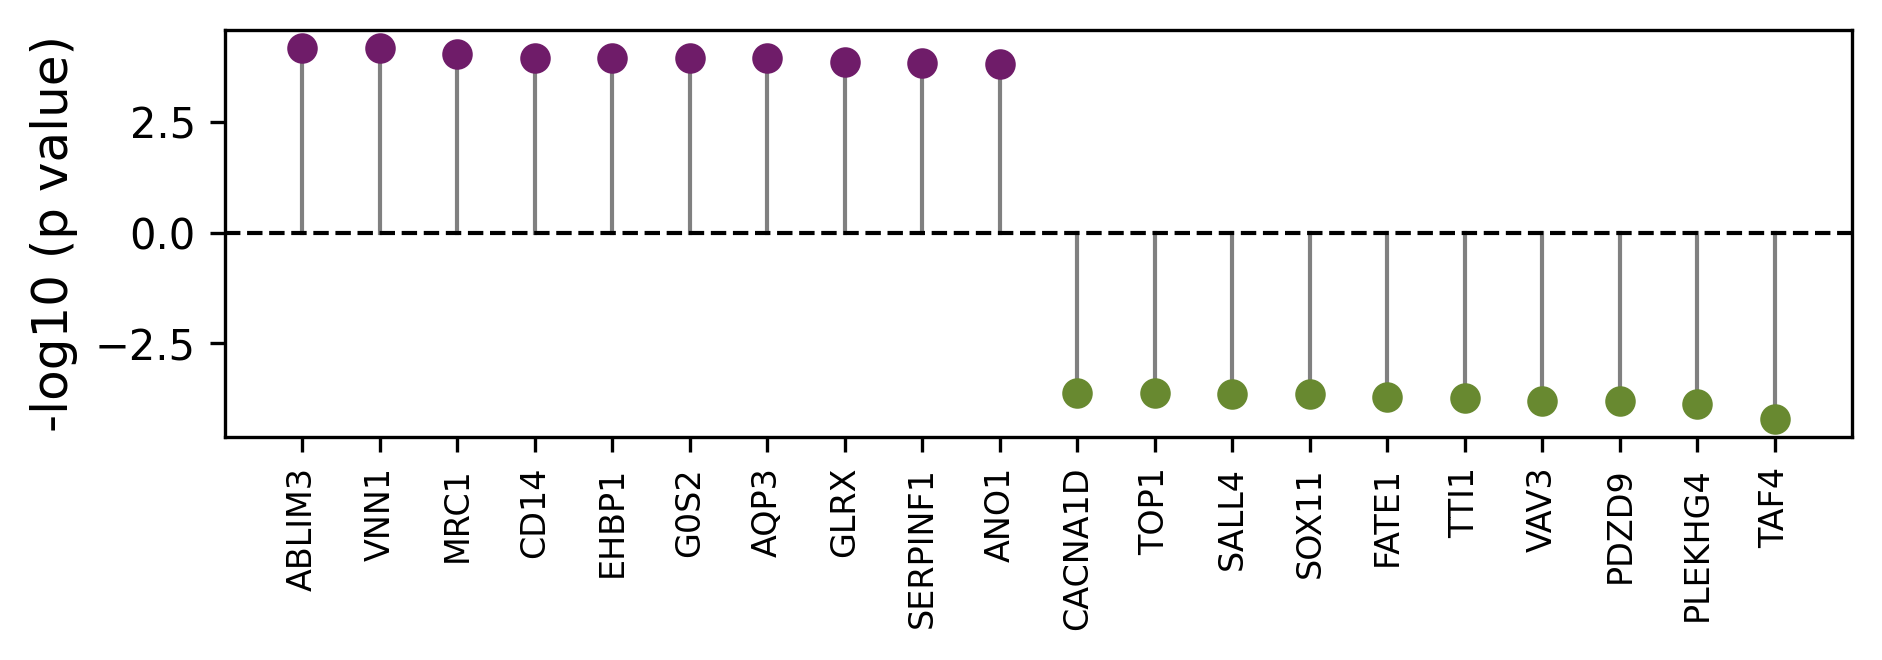

In [45]:
plt.figure(figsize=(7,1.8),dpi=300)
name = draw_['gene'].values.tolist()

for i in range(draw_.shape[0]):
    c= '#6f1c69'
    logfc = draw_.loc[i,'coef']
    lg_pall = draw_.loc[i,'lg_pall']
    if logfc<0:
        lg_pall = -lg_pall
        c= '#688930'
    plt.plot([i,i],[0,lg_pall],lw=1,c='grey',zorder=1)
    plt.scatter(i,lg_pall,s=40,c=c,zorder=2)
plt.plot([-1,draw_.shape[0]],[0,0],ls='--',lw=1,c='k')
plt.xticks(range(draw_.shape[0]),name,fontsize=8,rotation=90, ha='center') #,va='top'
plt.xlim(-1,draw_.shape[0])
plt.ylabel('-log10 (p value)',fontsize=12)
plt.show()

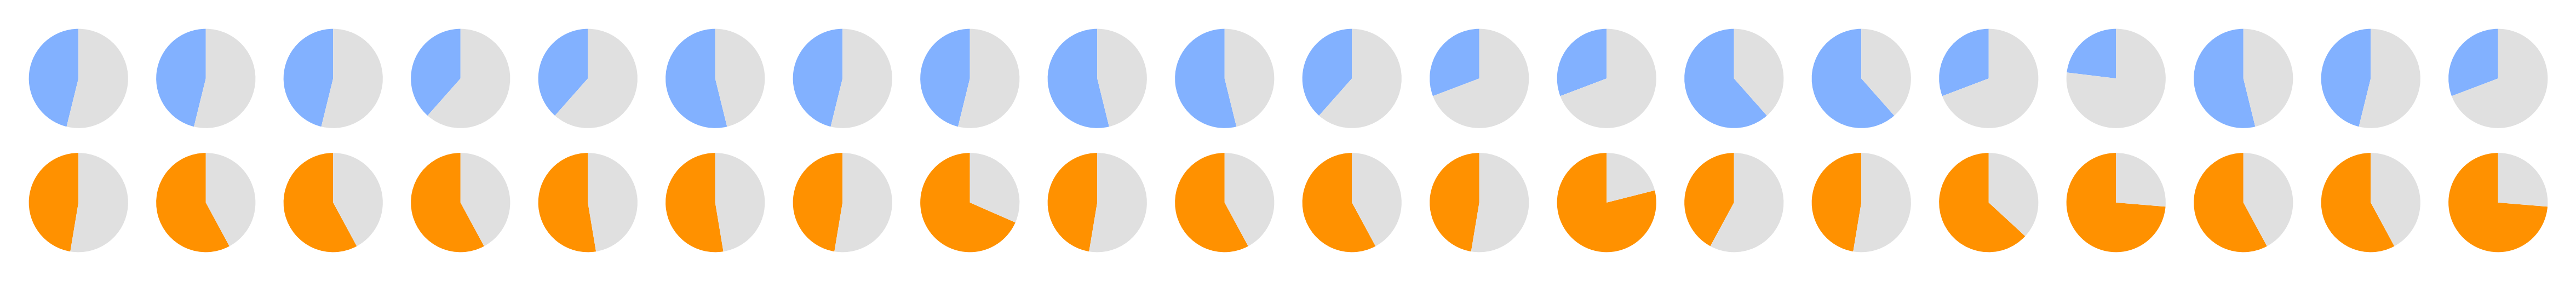

In [46]:
plt.rcParams['figure.figsize'] = [20, 2]
plt.rcParams['figure.dpi']=300
fig, axs = plt.subplots(2,draw_.shape[0])
c1 = '#82b1ff'
c2 = '#ff9100'
cb = '#e0e0e0'
for i in range(draw_.shape[0]):
    ra = draw_.loc[i,'RA']
    ri = draw_.loc[i,'RI']
    axs[0, i].pie([100*ra,100*(1-ra)], startangle=90,shadow=False, colors=[c1,cb])
    axs[1, i].pie([100*ri,100*(1-ri)], startangle=90,shadow=False, colors=[c2,cb])
plt.subplots_adjust(wspace=0,hspace=0)
plt.show() 